In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import datetime as dt
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset

mortality_data = pd.read_excel('/content/drive/MyDrive/Data/stmf.xlsx')
covid_cases_data = pd.read_csv('/content/drive/MyDrive/Data/owid-covid-cases.csv')

In [ ]:
mortality_data

,CountryCode,Year,Week,Sex,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast
0,AUS,2015,1,m,17.166833,358.833167,250.0,436.0,413.0,1475.0,0.000386,0.002373,0.013133,0.045643,0.127992,0.006484,1,0,0
1,AUS,2015,1,f,13.968728,199.031272,183.0,350.0,704.0,1450.0,0.000332,0.001309,0.009350,0.031185,0.125849,0.006289,1,0,0
2,AUS,2015,1,b,31.135561,557.864439,433.0,786.0,1117.0,2925.0,0.000360,0.001840,0.011215,0.037832,0.126633,0.006386,1,0,0
3,AUS,2015,2,m,17.473384,334.526616,255.0,386.0,422.0,1415.0,0.000393,0.002212,0.013395,0.040409,0.130781,0.006220,1,0,0
4,AUS,2015,2,f,11.490405,186.509595,162.0,322.0,675.0,1357.0,0.000273,0.001227,0.008277,0.028690,0.120665,0.005886,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118357,USA,2023,15,f,206.000000,5171.000000,5056.0,7294.0,10194.0,27921.0,0.000372,0.002521,0.014367,0.037380,0.138485,0.008656,0,0,1
118358,USA,2023,15,b,485.000000,14003.000000,11889.0,14890.0,16815.0,58082.0,0.000428,0.003399,0.017883,0.042412,0.144099,0.009095,0,0,1
118359,USA,2023,16,m,286.000000,8306.000000,6500.0,7642.0,6415.0,29149.0,0.000493,0.004015,0.020775,0.049003,0.148909,0.009224,0,0,1
118360,USA,2023,16,f,230.000000,4942.000000,4869.0,7135.0,10020.0,27196.0,0.000415,0.002409,0.013835,0.036565,0.136121,0.008431,0,0,1


In [ ]:
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118362 entries, 0 to 118361
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  118362 non-null  object 
 1   Year         118362 non-null  int64  
 2   Week         118362 non-null  int64  
 3   Sex          118362 non-null  object 
 4   D0_14        118362 non-null  float64
 5   D15_64       118362 non-null  float64
 6   D65_74       118362 non-null  float64
 7   D75_84       118362 non-null  float64
 8   D85p         118362 non-null  float64
 9   DTotal       118362 non-null  float64
 10  R0_14        118362 non-null  float64
 11  R15_64       118362 non-null  float64
 12  R65_74       118362 non-null  float64
 13  R75_84       118362 non-null  float64
 14  R85p         118362 non-null  float64
 15  RTotal       118362 non-null  float64
 16  Split        118362 non-null  int64  
 17  SplitSex     118362 non-null  int64  
 18  Forecast     118362 non-

In [ ]:
covid_cases_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316573,ZWE,Africa,Zimbabwe,2023-06-03,265139.0,32.0,21.000,5695.0,0.0,0.429,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
316574,ZWE,Africa,Zimbabwe,2023-06-04,265139.0,0.0,16.571,5695.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
316575,ZWE,Africa,Zimbabwe,2023-06-05,265139.0,0.0,15.571,5695.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
316576,ZWE,Africa,Zimbabwe,2023-06-06,265139.0,0.0,15.571,5695.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [ ]:
covid_cases_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316578 entries, 0 to 316577
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    316578 non-null  object 
 1   continent                                   301554 non-null  object 
 2   location                                    316578 non-null  object 
 3   date                                        316578 non-null  object 
 4   total_cases                                 280456 non-null  float64
 5   new_cases                                   307848 non-null  float64
 6   new_cases_smoothed                          306584 non-null  float64
 7   total_deaths                                259613 non-null  float64
 8   new_deaths                                  307908 non-null  float64
 9   new_deaths_smoothed                         306678 non-null  float64
 

In [ ]:
# Filter the Dataset

mortality_df = mortality_data[['CountryCode', 'Year', 'Week', 'Sex', 'DTotal', 'RTotal']]
covid_cases_df = covid_cases_data[['iso_code', 'date', 'total_cases', 'new_cases', 'total_vaccinations', 'new_vaccinations']]

In [ ]:
mortality_df

,CountryCode,Year,Week,Sex,DTotal,RTotal
0,AUS,2015,1,m,1475.0,0.006484
1,AUS,2015,1,f,1450.0,0.006289
2,AUS,2015,1,b,2925.0,0.006386
3,AUS,2015,2,m,1415.0,0.006220
4,AUS,2015,2,f,1357.0,0.005886
...,...,...,...,...,...,...
118357,USA,2023,15,f,27921.0,0.008656
118358,USA,2023,15,b,58082.0,0.009095
118359,USA,2023,16,m,29149.0,0.009224
118360,USA,2023,16,f,27196.0,0.008431


In [ ]:
mortality_df['CountryCode'].unique()

array(['AUS', 'AUT', 'BEL', 'BGR', 'CAN', 'CHE', 'CHL', 'CZE', 'DEUTNP',
       'DNK', 'ESP', 'EST', 'FIN', 'FRATNP', 'GBRTENW', 'GBR_NIR',
       'GBR_SCO', 'GRC', 'HRV', 'HUN', 'ISL', 'ISR', 'ITA', 'KOR', 'LTU',
       'LUX', 'LVA', 'NLD', 'NOR', 'NZL_NP', 'POL', 'PRT', 'RUS', 'SVK',
       'SVN', 'SWE', 'TWN', 'USA'], dtype=object)

In [ ]:
mortality_df = mortality_df[mortality_df['Sex'] == 'b'].reset_index(drop=True)
mortality_df

,CountryCode,Year,Week,Sex,DTotal,RTotal
0,AUS,2015,1,b,2925.0,0.006386
1,AUS,2015,2,b,2772.0,0.006052
2,AUS,2015,3,b,2770.0,0.006048
3,AUS,2015,4,b,2768.0,0.006043
4,AUS,2015,5,b,2680.0,0.005851
...,...,...,...,...,...,...
39449,USA,2023,12,b,59943.0,0.009387
39450,USA,2023,13,b,59125.0,0.009259
39451,USA,2023,14,b,57823.0,0.009055
39452,USA,2023,15,b,58082.0,0.009095


In [ ]:
# Fillna with Zero
covid_cases_df = covid_cases_df.fillna(0)

# Replace Column name
covid_cases_df.rename(columns={'iso_code':'CountryCode'},inplace=True)
covid_cases_df

,CountryCode,date,total_cases,new_cases,total_vaccinations,new_vaccinations
0,AFG,2020-01-03,0.0,0.0,0.0,0.0
1,AFG,2020-01-04,0.0,0.0,0.0,0.0
2,AFG,2020-01-05,0.0,0.0,0.0,0.0
3,AFG,2020-01-06,0.0,0.0,0.0,0.0
4,AFG,2020-01-07,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
316573,ZWE,2023-06-03,265139.0,32.0,0.0,0.0
316574,ZWE,2023-06-04,265139.0,0.0,0.0,0.0
316575,ZWE,2023-06-05,265139.0,0.0,0.0,0.0
316576,ZWE,2023-06-06,265139.0,0.0,0.0,0.0


In [ ]:
# Extract Week and Year
covid_cases_df['date'] = pd.to_datetime(covid_cases_df['date'])
covid_cases_df.loc[: , 'Week'] = covid_cases_df['date'].dt.isocalendar().week
covid_cases_df.loc[: ,'Year'] = covid_cases_df['date'].dt.year
covid_cases_df

,CountryCode,date,total_cases,new_cases,total_vaccinations,new_vaccinations,Week,Year
0,AFG,2020-01-03,0.0,0.0,0.0,0.0,1,2020
1,AFG,2020-01-04,0.0,0.0,0.0,0.0,1,2020
2,AFG,2020-01-05,0.0,0.0,0.0,0.0,1,2020
3,AFG,2020-01-06,0.0,0.0,0.0,0.0,2,2020
4,AFG,2020-01-07,0.0,0.0,0.0,0.0,2,2020
...,...,...,...,...,...,...,...,...
316573,ZWE,2023-06-03,265139.0,32.0,0.0,0.0,22,2023
316574,ZWE,2023-06-04,265139.0,0.0,0.0,0.0,22,2023
316575,ZWE,2023-06-05,265139.0,0.0,0.0,0.0,23,2023
316576,ZWE,2023-06-06,265139.0,0.0,0.0,0.0,23,2023


In [ ]:
# print(covid_cases_df[covid_cases_df['Week'] == 52])
# print(covid_cases_df[covid_cases_df['Year'] == 2023])

In [ ]:
# Grouping covid_cases by Country, Year and Week
covid_cases_df = covid_cases_df.groupby(['CountryCode', 'Year', 'Week']).agg({'total_cases':'max', 'new_cases':'sum', 'total_vaccinations':'max', 'new_vaccinations':'sum'})
covid_cases_df = pd.DataFrame(covid_cases_df).reset_index()
covid_cases_df

,CountryCode,Year,Week,total_cases,new_cases,total_vaccinations,new_vaccinations
0,ABW,2020,1,0.0,0.0,0.0,0.0
1,ABW,2020,2,0.0,0.0,0.0,0.0
2,ABW,2020,3,0.0,0.0,0.0,0.0
3,ABW,2020,4,0.0,0.0,0.0,0.0
4,ABW,2020,5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
46016,ZWE,2023,20,264936.0,95.0,0.0,0.0
46017,ZWE,2023,21,265023.0,87.0,0.0,0.0
46018,ZWE,2023,22,265139.0,116.0,0.0,0.0
46019,ZWE,2023,23,265139.0,0.0,0.0,0.0


In [ ]:
covid_cases_df[((covid_cases_df['total_vaccinations'] > 0) | (covid_cases_df['new_vaccinations'] > 0)) & (covid_cases_df['Year'] == 2022)]

,CountryCode,Year,Week,total_cases,new_cases,total_vaccinations,new_vaccinations
106,ABW,2022,1,25254.0,5535.0,164165.0,322.0
107,ABW,2022,2,29694.0,4440.0,164635.0,340.0
108,ABW,2022,3,31835.0,2141.0,166004.0,1279.0
109,ABW,2022,4,32718.0,883.0,166344.0,109.0
110,ABW,2022,5,33200.0,482.0,166780.0,340.0
...,...,...,...,...,...,...,...
45980,ZWE,2022,36,256870.0,115.0,12161598.0,0.0
45982,ZWE,2022,38,257340.0,344.0,12187779.0,15248.0
45983,ZWE,2022,39,257517.0,177.0,12214870.0,16434.0
45984,ZWE,2022,40,257655.0,138.0,12222754.0,1978.0


In [ ]:
# covid_cases_df[covid_cases_df['CountryCode'] == 'TWN']
# mortality_df[mortality_df['CountryCode'] == 'TWN']

In [ ]:
merged_df = pd.merge(mortality_df, covid_cases_df, on=['CountryCode', 'Year', 'Week'])
merged_df

,CountryCode,Year,Week,Sex,DTotal,RTotal,total_cases,new_cases,total_vaccinations,new_vaccinations
0,AUS,2020,1,b,2926.0,0.005947,0.0,0.0,0.0,0.0
1,AUS,2020,2,b,2902.0,0.005898,0.0,0.0,0.0,0.0
2,AUS,2020,3,b,2914.0,0.005922,0.0,0.0,0.0,0.0
3,AUS,2020,4,b,3007.0,0.006111,4.0,4.0,0.0,0.0
4,AUS,2020,5,b,2910.0,0.005914,12.0,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5324,USA,2023,12,b,59943.0,0.009387,102697566.0,152968.0,674388697.0,342445.0
5325,USA,2023,13,b,59125.0,0.009259,102873924.0,176358.0,674708566.0,319869.0
5326,USA,2023,14,b,57823.0,0.009055,102977396.0,103472.0,674988543.0,279977.0
5327,USA,2023,15,b,58082.0,0.009095,103081453.0,104057.0,675261871.0,273328.0


In [ ]:
merged_df.groupby(['CountryCode']).max()['total_cases']

In [ ]:
merged_df_2022 = merged_df[merged_df['Year']==2022].groupby(['CountryCode']).agg({'total_cases': 'max', 'RTotal':'max'}).reset_index()
merged_df_2022

,CountryCode,total_cases,RTotal
0,AUS,10785559.0,0.008445
1,AUT,5700848.0,0.013442
2,BEL,4684904.0,0.013685
3,BGR,1292033.0,0.027931
4,CAN,4492624.0,0.010899
5,CHE,4380463.0,0.010619
6,CHL,5032352.0,0.009437
7,CZE,4580110.0,0.015376
8,DNK,3388439.0,0.012517
9,ESP,13684236.0,0.012365


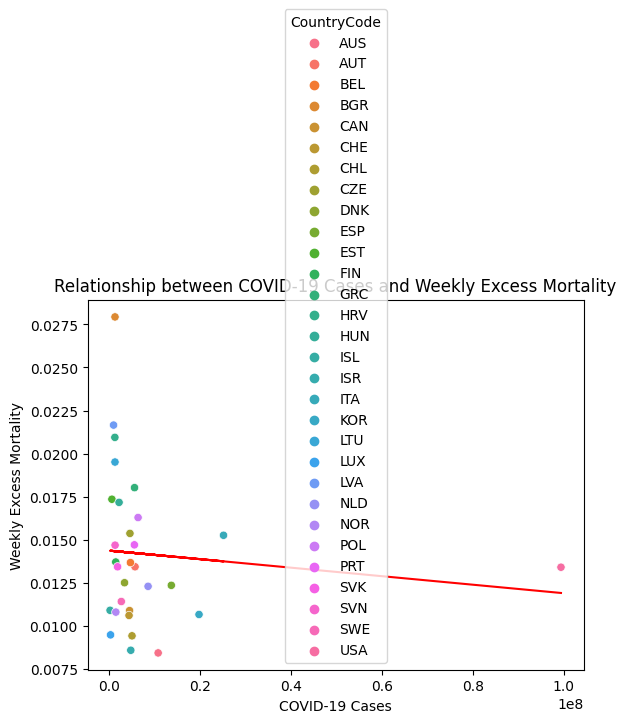

In [ ]:
y = merged_df_2022['RTotal'].values.reshape(-1, 1)
X = merged_df_2022['total_cases'].values.reshape(-1, 1)
regression_model = LinearRegression()
regression_model.fit(X, y)

# Make predictions using the fitted model
y_pred = regression_model.predict(X)

# Calculate the R-squared value
r2 = r2_score(y, y_pred)

# Plot the graph
sns.scatterplot(y=merged_df_2022['RTotal'], x=merged_df_2022['total_cases'], hue=merged_df_2022['CountryCode'])
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.2f})')
plt.ylabel('Weekly Excess Mortality')
plt.xlabel('COVID-19 Cases')
plt.title('Relationship between COVID-19 Cases and Weekly Excess Mortality')
plt.show()